**Problem Statement Summary:**

Jamboree seeks to develop a tool on their website that estimates the probability of Indian students gaining admission to Ivy League colleges. Challenges include collecting relevant data on past admissions, selecting significant admission factors, developing an accurate predictive model, and validating its reliability.

**Solution Approach Summary:**

We will gather and preprocess data on Indian students' Ivy League admissions, engineer features, select appropriate machine learning algorithms, and train the model.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [ ]:
df['Research'].unique()

array([1, 0])

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.728590,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,-1.721662,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-1.714734,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,-1.707806,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-1.700877,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...,...
495,1.700877,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.707806,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.714734,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,1.721662,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


**train test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(500, 9)

In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
x=data.drop(columns=['Chance of Admit '])
y=data['Chance of Admit ']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.shape

(335, 8)

In [ ]:
x_test.shape

(165, 8)

In [ ]:
y_train.shape

(335,)

In [ ]:
y_test.shape

(165,)

**linear regression using sklearn**

In [ ]:
#let's  first take single variable and train our model
x1=x[['GRE Score']]
x1_train=x_train[['GRE Score']]
x1_test=x_test[['GRE Score']]

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.82920928])

In [ ]:
model.intercept_

0.009588584335869229

In [ ]:
y_hat=model.predict(x1_test)

In [ ]:
y_hat

array([ 1.29765812, -0.17206978, -0.09858339, -0.31904257,  0.70976696,
        0.93022614, -1.93574326, -1.12739292,  0.1218758 ,  0.26884859,
        0.48930777, -0.02509699,  0.41582138,  1.73857649,  0.56279417,
       -1.49482489,  1.15068533, -1.20087931, -1.3478521 , -1.4213385 ,
       -0.68647455, -1.4213385 , -0.39252897,  0.78325335,  0.78325335,
       -1.12739292,  1.00371254,  0.85673975, -0.31904257, -0.31904257,
       -1.20087931,  0.19536219, -0.83344734,  0.48930777, -0.02509699,
        0.19536219, -1.20087931,  1.15068533, -1.12739292, -0.09858339,
        1.73857649, -1.12739292, -0.39252897,  0.78325335,  1.73857649,
       -1.12739292,  1.5181173 ,  0.78325335,  0.78325335,  0.85673975,
        0.34233498, -1.27436571, -0.98042013, -1.12739292,  1.44463091,
        0.26884859,  1.66509009,  0.1218758 , -1.3478521 , -1.49482489,
       -1.12739292, -0.61298815, -0.83344734, -0.90693373, -1.64179768,
       -0.68647455,  0.56279417,  0.93022614, -0.46601536,  0.12

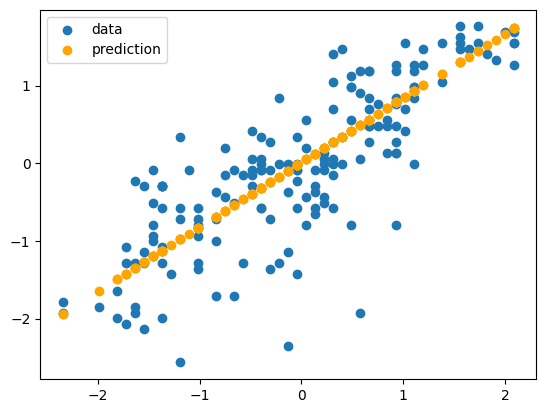

In [ ]:
fig=plt.figure()
plt.scatter(x1_test,y_test,label='data')
plt.scatter(x1_test,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [ ]:
# multivariate - let's now generalize our model to whole data
print(x.shape,y.shape)

(500, 8) (500,)


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.09514689, 0.17262271, 0.16207316, 0.02274661, 0.02650229,
       0.09549515, 0.49373021, 0.05433917])

In [ ]:
model.intercept_

0.010765783160957162

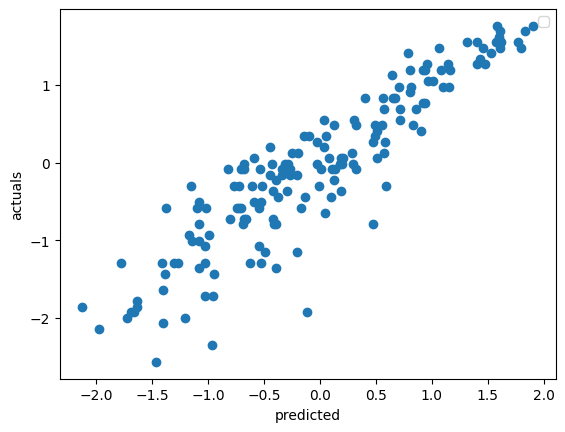

In [ ]:
y_hat=model.predict(x_test)
plt.scatter(y_hat,y_test)
plt.xlabel('predicted')
plt.ylabel('actuals')
plt.legend()
plt.show()

**Let's check the performance of our previously trained model on test data.**

linear regression's default .score()  function uses R2 score to evaluate the data

In [ ]:
model.score(x_train,y_train)

0.8263720415892004

In [ ]:
model.score(x_test,y_test)

0.8310239580242439

**model interpretability**

so we'll check which feature is the most important in our case

In [ ]:
model.coef_

array([0.09514689, 0.17262271, 0.16207316, 0.02274661, 0.02650229,
       0.09549515, 0.49373021, 0.05433917])

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Serial No.'),
  Text(1, 0, 'GRE Score'),
  Text(2, 0, 'TOEFL Score'),
  Text(3, 0, 'University Rating'),
  Text(4, 0, 'SOP'),
  Text(5, 0, 'LOR '),
  Text(6, 0, 'CGPA'),
  Text(7, 0, 'Research')])

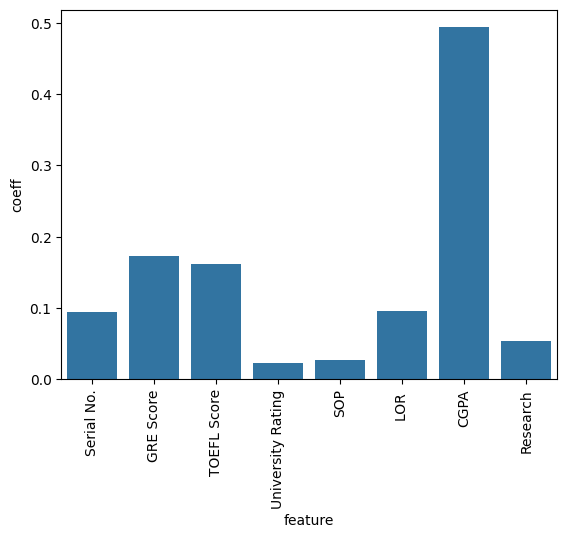

In [ ]:
imp=pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),
                 columns=['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=90)

In [ ]:
x_test.columns[np.argmax(np.abs(model.coef_))]

'CGPA'

In [ ]:
x_test.columns[np.argmin(np.abs(model.coef_))]

'University Rating'

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.model=sm.OLS(y_train,x_train).fit()
print(sm.model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.826
Model:                            OLS   Adj. R-squared (uncentered):              0.822
Method:                 Least Squares   F-statistic:                              194.6
Date:                Wed, 08 May 2024   Prob (F-statistic):                   1.94e-119
Time:                        19:24:56   Log-Likelihood:                         -178.67
No. Observations:                 335   AIC:                                      373.3
Df Residuals:                     327   BIC:                                      403.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
x_t=pd.DataFrame(x_train,columns=x_train.columns)
vif['features']=x_t.columns
vif['VIF']=[variance_inflation_factor(x_t.values,i) for i in range(x_t.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
6,CGPA,4.82
1,GRE Score,4.66
2,TOEFL Score,3.54
4,SOP,2.97
3,University Rating,2.78
5,LOR,2.09
7,Research,1.51
0,Serial No.,1.04


In [ ]:
cols2=vif['features'][1:].values
x2=pd.DataFrame(x_train,columns=x_train.columns)[cols2]
x2_sm=sm.add_constant(x2)
sm_model=sm.OLS(list(y_train),x2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     162.6
Date:                Wed, 08 May 2024   Prob (F-statistic):          1.87e-102
Time:                        19:27:16   Log-Likelihood:                -220.64
No. Observations:                 335   AIC:                             457.3
Df Residuals:                     327   BIC:                             487.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0083      0.02

In [ ]:
x2

,GRE Score,TOEFL Score,SOP,University Rating,LOR,Research,Serial No.
471,-0.484941,-0.689952,-1.387862,-0.099793,0.558125,-1.128152,1.534600
26,0.489904,0.297575,1.137360,1.650957,0.017306,-1.128152,-1.548457
7,-0.750808,-1.019128,-0.377773,-0.975168,0.558125,-1.128152,-1.680093
453,0.224037,-0.689952,-0.882817,-0.099793,0.558125,0.886405,1.409892
108,1.287504,1.449690,1.642404,1.650957,1.639763,0.886405,-0.980343
...,...,...,...,...,...,...,...
106,1.110260,0.626751,1.137360,0.775582,1.098944,0.886405,-0.994199
270,-0.928052,-0.360777,-0.882817,-0.975168,-0.523513,0.886405,0.142028
348,-1.282541,-1.348304,-1.387862,-1.850542,-1.605151,-1.128152,0.682429
435,-0.662185,-0.360777,-0.882817,-0.975168,0.558125,-1.128152,1.285184


**Insights:**

**Model Performance**: The uncentered R-squared value of 0.826 indicates that the model explains approximately 82.6% of the variance in the chance of admission.<br>
**Feature Importance**: The coefficients of features suggest that CGPA, GRE Score, and TOEFL Score have the most significant positive impact on the chance of admission. Serial No. also shows a positive impact but to a lesser extent. SOP, University Rating, and Research have less influence, and University Rating has a p-value indicating insignificance.<br>
**Multicollinearity**: The VIF analysis reveals moderate to high multicollinearity among some features, particularly CGPA, GRE Score, and TOEFL Score.

**Recommendations:**

**Focus on Strongest Features**: Encourage students to focus on improving their CGPA, GRE Score, and TOEFL Score as these factors have the most significant positive impact on admission chances. Providing resources and guidance for enhancing academic performance and test preparation can be beneficial.<br>
**Address Weaknesses**: While factors like University Rating and SOP have a lower impact on admission chances, students should still aim to strengthen these aspects of their applications. Providing guidance on crafting compelling statements of purpose and obtaining strong letters of recommendation can improve these areas.<br>
**Continuous Monitoring and Improvement**: Regularly monitor model performance and update the guidance tool based on changes in admission criteria or applicant profiles. Additionally, continue refining the model by incorporating feedback and collecting more diverse and comprehensive data.<br>
**Personalized Guidance**: Provide personalized guidance to students based on their individual profiles and areas for improvement identified by the model. Tailoring recommendations to address specific weaknesses can increase the effectiveness of the guidance provided

Implementing Ridge and Lasso regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Ridge Regression
ridge = Ridge()
ridge.fit(x_train, y_train)
ridge_pred=ridge.predict(x_test)
ridge_mse=mean_squared_error(y_test, ridge_pred)
ridge_r2=r2_score(y_test, ridge_pred)

In [ ]:
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R-squared:", ridge_r2)

Ridge Regression MSE: 0.17503158844609928
Ridge Regression R-squared: 0.831107343662608


In [ ]:
# Lasso Regression
lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [ ]:
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:", lasso_r2)

Lasso Regression MSE: 1.0452068026175467
Lasso Regression R-squared: -0.008547970587327258


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning for Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(x_train, y_train)
best_ridge = ridge_grid.best_estimator_
print("Best Ridge Regression Model:", best_ridge)

Best Ridge Regression Model: Ridge(alpha=10)


In [ ]:
# Hyperparameter tuning for Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(x_train, y_train)
best_lasso = lasso_grid.best_estimator_
print("Best Lasso Regression Model:", best_lasso)

Best Lasso Regression Model: Lasso(alpha=0.01)


In [ ]:
# Retraining Ridge Regression with best parameters
best_alpha_ridge = best_ridge.alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(x_train, y_train)
ridge_best_pred = ridge_best.predict(x_test)
ridge_best_mse = mean_squared_error(y_test, ridge_best_pred)
ridge_best_r2 = r2_score(y_test, ridge_best_pred)

In [ ]:
print("Ridge Regression (Best) MSE:", ridge_best_mse)
print("Ridge Regression (Best) R-squared:", ridge_best_r2)

Ridge Regression (Best) MSE: 0.1747334058203459
Ridge Regression (Best) R-squared: 0.8313950680452993


In [ ]:
# Retraining Lasso Regression with best parameters
best_alpha_lasso = best_lasso.alpha
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(x_train, y_train)
lasso_best_pred = lasso_best.predict(x_test)
lasso_best_mse = mean_squared_error(y_test, lasso_best_pred)
lasso_best_r2 = r2_score(y_test, lasso_best_pred)

In [ ]:
print("Lasso Regression (Best) MSE:", lasso_best_mse)
print("Lasso Regression (Best) R-squared:", lasso_best_r2)

Lasso Regression (Best) MSE: 0.17571324891403542
Lasso Regression (Best) R-squared: 0.8304495912639009
